# Video Game Predictions [ITCS 3156]
## By: Adam Kerns

# 1. Initial Imports and Initialization:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

Getting and Displaying the Dataset:

In [5]:
games = pd.read_csv("Video_Games.csv")

games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Showing the shape, features, and datatypes of the dataset:

In [7]:
games.shape

(16719, 16)

In [8]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

---
# 2. First Issue

What seemed interesting to me is that the User_Score was an object so I delved into why:

In [10]:
list(games.User_Score.unique())

['8',
 nan,
 '8.3',
 '8.5',
 '6.6',
 '8.4',
 '8.6',
 '7.7',
 '6.3',
 '7.4',
 '8.2',
 '9',
 '7.9',
 '8.1',
 '8.7',
 '7.1',
 '3.4',
 '5.3',
 '4.8',
 '3.2',
 '8.9',
 '6.4',
 '7.8',
 '7.5',
 '2.6',
 '7.2',
 '9.2',
 '7',
 '7.3',
 '4.3',
 '7.6',
 '5.7',
 '5',
 '9.1',
 '6.5',
 'tbd',
 '8.8',
 '6.9',
 '9.4',
 '6.8',
 '6.1',
 '6.7',
 '5.4',
 '4',
 '4.9',
 '4.5',
 '9.3',
 '6.2',
 '4.2',
 '6',
 '3.7',
 '4.1',
 '5.8',
 '5.6',
 '5.5',
 '4.4',
 '4.6',
 '5.9',
 '3.9',
 '3.1',
 '2.9',
 '5.2',
 '3.3',
 '4.7',
 '5.1',
 '3.5',
 '2.5',
 '1.9',
 '3',
 '2.7',
 '2.2',
 '2',
 '9.5',
 '2.1',
 '3.6',
 '2.8',
 '1.8',
 '3.8',
 '0',
 '1.6',
 '9.6',
 '2.4',
 '1.7',
 '1.1',
 '0.3',
 '1.5',
 '0.7',
 '1.2',
 '2.3',
 '0.5',
 '1.3',
 '0.2',
 '0.6',
 '1.4',
 '0.9',
 '1',
 '9.7']

It turns out that some of the user's used 'tbd' which converted the whole column to be objects and not floats. For the data that are Strings and not floats, I will try and convert those.  

In [12]:
games['User_Score'] = pd.to_numeric(games['User_Score'], errors='coerce')
print(games['User_Score'].dtype)
drop_all_null_games = games # Will be used later
games['User_Score'].head()

float64


0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: User_Score, dtype: float64

In [13]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

---

## 2.1 Handling Null Values

We're gonna check for any null values and get rid of them

In [16]:
null_df=pd.DataFrame(games.isnull().sum(), columns = ['Null Count'] )
null_df.sort_values('Null Count', ascending=False)

,Null Count
User_Score,9129
User_Count,9129
Critic_Score,8582
Critic_Count,8582
Rating,6769
Developer,6623
Year_of_Release,269
Publisher,54
Name,2
Genre,2


In [17]:
games.dropna(subset=['Name', 'Publisher', 'Year_of_Release'],inplace=True)
games['User_Score'].fillna(games['User_Score'].mean(), inplace=True)
games['User_Count'].fillna(games['User_Count'].mean(), inplace=True)
games['Critic_Count'].fillna(games['Critic_Count'].mean(), inplace=True)
games['Critic_Score'].fillna(games['Critic_Score'].mean(), inplace=True)

null_df=pd.DataFrame(games.isnull().sum(), columns = ['Null Count'] )
null_df.sort_values('Null Count', ascending=False)

/var/folders/rq/jhs0122j1jvb96bbhr21_ww00000gn/T/ipykernel_52158/3464387652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['User_Score'].fillna(games['User_Score'].mean(), inplace=True)
/var/folders/rq/jhs0122j1jvb96bbhr21_ww00000gn/T/ipykernel_52158/3464387652.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

,Null Count
Rating,6649
Developer,6512
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0


In [18]:
games.shape

(16416, 16)

I can't get rid of all of the null values because that would render the data to have too little data to work with so getting rid of the bottom three amount of null categories will help some with null values but still be important to keep in mind. I also attempted to fill the `User_Score` with the mean of the entire column as to not through off the dataset too much.

---

<h1 id=plot-visual>3. Plotting and Visualizations</h1>

We can only compare the categories that are numbers; I decided to first look at what the users rated the games. Immediately we can see where we added the mean into the `User_Score` column

This is the mean User_Score which shows up as the tallest bar in the histogram: 7.126899879372739


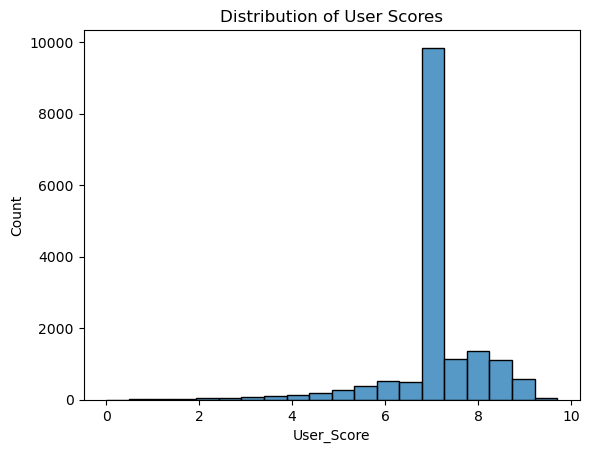

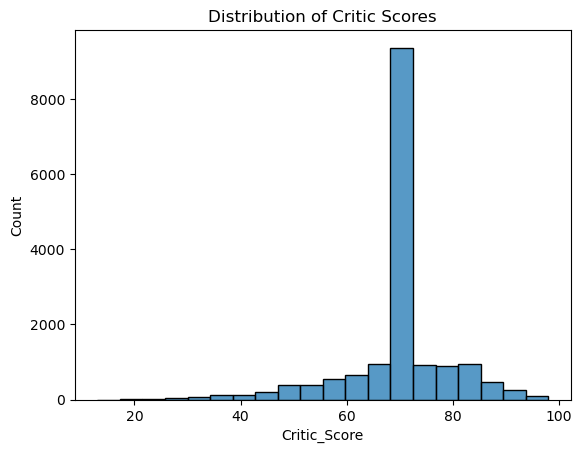

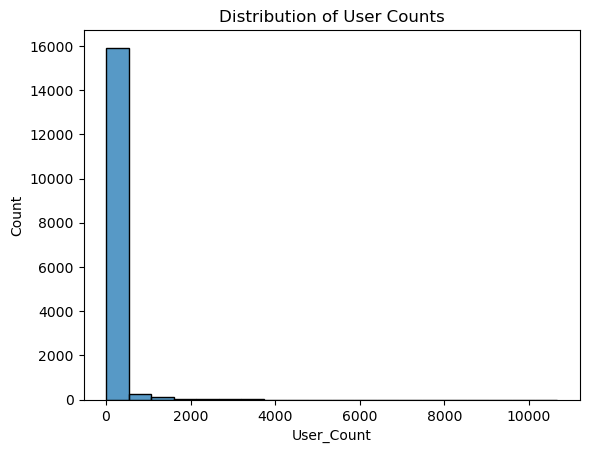

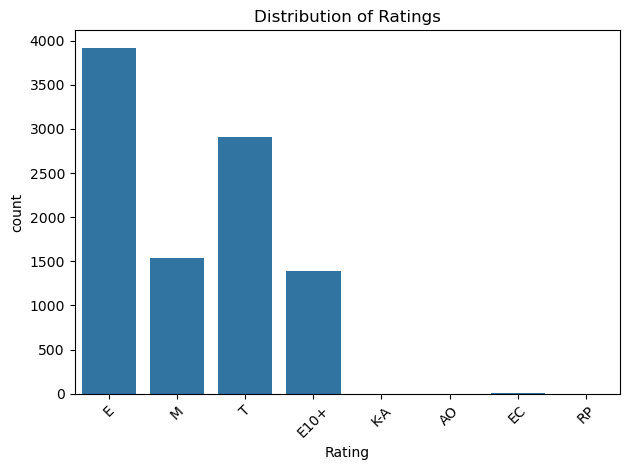

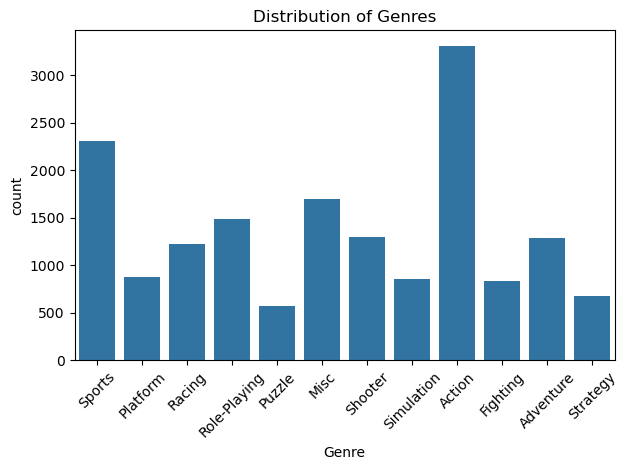

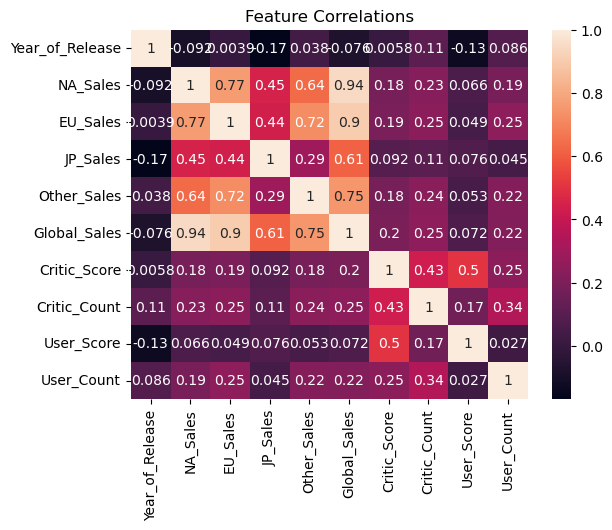

In [22]:
mean_score = games['User_Score'].mean()
print(f'This is the mean User_Score which shows up as the tallest bar in the histogram: {mean_score}')

sns.histplot(games['User_Score'], bins=20)
plt.title('Distribution of User Scores')
plt.show()

sns.histplot(games['Critic_Score'], bins=20)
plt.title('Distribution of Critic Scores')
plt.show()

sns.histplot(data=games['User_Count'], bins=20)
plt.title('Distribution of User Counts')
plt.show()

sns.countplot(x='Rating', data=games)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.countplot(x='Genre', data=games)
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

numeric_cols = games.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True)
plt.title('Feature Correlations')
plt.show()

# 4. Model Rationale for Predicting Global Sales:

I used 3 models: K-Nearest Neighbors, Ridge Regression, and MLPRegressor (a neural network). 

## KNN
KNN is good for visualizing, you can compare similar games having similar features in order to generalize global sales, and it doesn't need a specific function (i.e. `tanh` or `relu`) to work, it compares the features from training to figure out the correct target.

## Ridge Regression
While Ridge Regression is a linear model, it is able to work fast and is able to work well with large datasets like the Video Games dataset used in this project. Since this is a linear model it doesn't express the target feature well.

## MLPRegressor (Neural Network)
Neural networks are really compatible with features that correlate minorly. Once preprocessed it can handle different types of data well, since we had floats and categories it is important that neural networks can handle this to check for correlation. It is also very flexible in how deep or shallow you make the network. MLPRegressor has a `hidden_layer_size` parameter as well as other parameters to manage the neural network.

---

# 4.1 Quick Notes:
* `Global_Sales` as well as the other *`Sales` features had to be dropped as the other `Sales` features correlated directly with `Global_Sales` causing the model to easily predict the `Global_Sales` just by adding the *`Sales` features together.

* Instead of using a premade Mean Squared Error function I decided to make my own to see what the error as well as other parts of the Mean Squared Error formula

## Another Note:
Will take a while to run if you restart the kernel due to the computations the neural network has to do. 

# 5. Functions and Results

In [26]:
def MSE(y_act, y_pred, visualize):
    y_act = y_act.to_numpy()
    err = 0
    sq_err = 0
    sum_err = 0
    visualize_err = 0
    length = len(y_act)
    
    for i in range(length):
        if visualize:
            print(f'{i+1}.')
        y_act_i = y_act[i]
        y_pred_i = y_pred[i]
        err = y_act_i - y_pred_i
        if visualize:
            print(f'Error: {err}')
            visualize_err += err # This is for me to check the error manually
            print(f'Cumulative error not squared: {visualize_err}')
        sq_err = err ** 2
        sum_err += sq_err
        if visualize:
            print(f'Sum of err at {i+1}. : {sum_err}')

    return sum_err / length 

# 5.1 Predicting Global Sales

MSEs:
KNN MSE: 2.368464045371502
Ridge Regression MSE: 3.4197926989904275
Neural Network MSE: 2.337167869191129

R2 Scores:
KNN R2: 0.4407049613198961
Ridge Regression R2: 0.1924415768111103
Neural Network R2: 0.44809531883938025


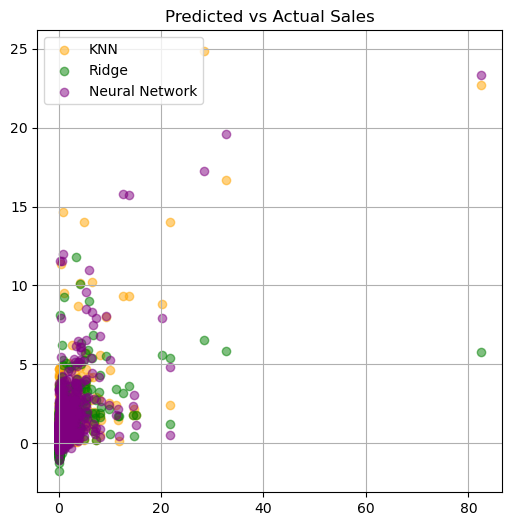

In [28]:
def predicting_Global_Sales(games):

    # Apply One-hot encoding to non-numerical columns like `Publisher`, `Platform`, `Genre`, `Developer` and `Rating`.     
    games = pd.get_dummies(games, columns=['Genre', 'Platform', 'Rating', 'Publisher', 'Developer'], drop_first=True)
    
    # Define features and target
    X = games.drop(['Name', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
    y = games['Global_Sales']
    
    # Split data
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)
    
    # KNN Regression
    knn = KNeighborsRegressor(n_neighbors=4)
    knn.fit(X_train_scaled, y_train)
    knn_preds = knn.predict(X_test_scaled)
    
    # Ridge Regression
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train_scaled, y_train)
    ridge_preds = ridge.predict(X_test_scaled)
    
    # Neural Network Regression (MLP)
    mlp = MLPRegressor(hidden_layer_sizes=(64,64), activation='relu', solver='adam', max_iter=2000, random_state=42, learning_rate='adaptive')
    mlp.fit(X_train_scaled, y_train)
    mlp_preds = mlp.predict(X_test_scaled)

    # Metrics
    print('MSEs:')
    visualize = False # Can change visualize to true in order to see how much the error changes
    print("KNN MSE:", MSE(y_test, knn_preds, visualize=visualize)) 
    print("Ridge Regression MSE:", MSE(y_test, ridge_preds, visualize=visualize))
    print("Neural Network MSE:", MSE(y_test, mlp_preds, visualize=visualize))
    print('\nR2 Scores:')
    print("KNN R2:", r2_score(y_test, knn_preds))
    print("Ridge Regression R2:", r2_score(y_test, ridge_preds))
    print("Neural Network R2:", r2_score(y_test, mlp_preds))
    
    # Plotting
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, knn_preds, alpha=0.5, label="KNN", color='orange')
    plt.scatter(y_test, ridge_preds, alpha=0.5, label="Ridge", color='green')
    plt.scatter(y_test, mlp_preds, alpha=0.5, label="Neural Network", color='purple')
    plt.title("Predicted vs Actual Sales")
    if visualize:
        plt.plot(y, label="Actual", color='black')
    plt.legend()
    plt.grid()
    plt.show()

predicting_Global_Sales(games)

## 5.1.1 Results of Predicting Global Sales

Based on the R2 scores, Ridge Regression did badly. This is because Ridge Regression is a linear model when the target is more of a logarithmic curve. KNN did better with around 50% performance at its best. This may be due to neighbors being close and far to it. Finally did the best with around 53% performance. This isn't the greatest for being the best model but for this to not do the best tells me theres little to no correlation between sales and other features as shown by the heatmap under [Section 3](#plot-visual)

---
# 5.2 Model Rationale for Predicting Genre

The models used going forward are similar to the ones used previously but instead of regression models, these are classifier models.

### 1. KNeighborsClassifiers
### 2. LogisticRegression
### 3. MLPClassifier

# 5.3 Predicting Genre without Sales

In [ ]:
def predicting_Genre_no_sales(games):
    
    genre_labels = games['Genre']

    # use label encoding for the target (Genre)
    encoder = LabelEncoder()

    # use one how coding for the other non-numerical columns
    games_encoded = pd.get_dummies(games.drop(['Genre'], axis=1), columns=['Platform', 'Rating', 'Publisher', 'Developer'], drop_first=True)
    
    # Define features and target
    X = games_encoded.drop(['Name', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
    y = encoder.fit_transform(genre_labels)

    # Split data
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    # make a dictionary of the models to iterate through
    models = {
        'KNN': KNeighborsClassifier(n_neighbors=4),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(64,64), max_iter=1000, random_state=42)   
    }

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, preds)
        print(f'\n{name} Accuracy: {acc:.4f}')
        print(f'{name} Classification Report:')
        print(classification_report(y_test, preds, target_names=encoder.classes_))

predicting_Genre_no_sales(games)


KNN Accuracy: 0.4543
KNN Classification Report:
              precision    recall  f1-score   support

      Action       0.42      0.62      0.50       640
   Adventure       0.40      0.48      0.43       252
    Fighting       0.43      0.43      0.43       165
        Misc       0.39      0.45      0.42       346
    Platform       0.36      0.30      0.33       177
      Puzzle       0.32      0.20      0.25       114
      Racing       0.46      0.40      0.43       229
Role-Playing       0.54      0.47      0.51       312
     Shooter       0.58      0.34      0.43       267
  Simulation       0.42      0.30      0.35       154
      Sports       0.57      0.54      0.55       495
    Strategy       0.52      0.24      0.33       133

    accuracy                           0.45      3284
   macro avg       0.45      0.40      0.41      3284
weighted avg       0.46      0.45      0.45      3284


Logistic Regression Accuracy: 0.5012
Logistic Regression Classification Report:
   

## 5.3.1 Results of Predicting Genre without Sales

Based on the accuracies and classification reports, KNN had a 45% accuracy, MLPClassifier had a 48% accuracy, and Logistic Regression did the best with a 50% accuracy.

---

# 5.4 Predicting Genre with Sales

In [ ]:
def predicting_Genre(games):
    
    genre_labels = games['Genre']

    # use label encoding for the target (Genre)
    encoder = LabelEncoder()

    # use one how coding for the other non-numerical columns
    games_encoded = pd.get_dummies(games.drop(['Genre'], axis=1), columns=['Platform', 'Rating', 'Publisher', 'Developer'], drop_first=True)
    
    # Define features and target
    X = games_encoded.drop(['Name'], axis=1)
    y = encoder.fit_transform(genre_labels)

    # Split data
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    # make a dictionary of the models to iterate through
    models = {
        'KNN': KNeighborsClassifier(n_neighbors=4),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(64,64), max_iter=1000, random_state=42)   
    }

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, preds)
        print(f'\n{name} Accuracy: {acc:.4f}')
        print(f'{name} Classification Report:')
        print(classification_report(y_test, preds, target_names=encoder.classes_))

predicting_Genre(games)

## 5.4.1 Results of Predicting Genre with Sales

Based on the accuracies and classification reports, KNN had a 46% accuracy, MLPClassifier had a 49% accuracy, and Logistic Regression did the best with a 50% accuracy. This is very similar to without using the sales features. This shows me there is very little correlation between sales and genre.

---

## 5.5 Small Turning Point

At this point in the project, I started to wonder whether me adding the mean in place of the null values messed with the data. In this next section, instead of using the last `games` dataframe, I will use the dataframe that erases the entries with null values. Depending on whether this gives me better outcomes could mean I messed up the dataset by adding the mean into some of the null values.

In [ ]:
drop_all_null_games.dropna(subset=['User_Score', 'Critic_Score', 'Year_of_Release', 'Rating', 'Publisher'], inplace=True)
drop_all_null_games.isnull().sum()

In [ ]:
predicting_Global_Sales(drop_all_null_games)

In [ ]:
predicting_Genre_no_sales(drop_all_null_games)

In [ ]:
predicting_Genre(drop_all_null_games)

## 5.5.1 Results:

The accuracy is minimally different other than predicting `Global_Sales`. For predicting the `Global_Sales`, everything was substantially worse. For predicting the `Genre`, the neural network improved but the logistic regression and KNN both dropped.

# 6. Project Results

#### Overview
This project evaluated the effectiveness of four machine learning models—**K-Nearest Neighbors (KNN)**, **Ridge Regression**, **Neural Networks**, and **Logistic Regression**—on two tasks:  
1. **Predicting game genre (classification)**  
2. **Predicting global sales (regression)**  

We compared model performance across two data preprocessing strategies to handle missing values:
- **Adding in Mean**
- **Dropping Null Rows**

---

#### 1. Genre Prediction (Classification)

- **With Sales Features**:
  - **Best Model**: Logistic Regression showed consistently strong performance with high precision and recall, benefiting from sales-related features.
  - **Neural Network** also performed competitively but showed higher variance in some categories.

- **Without Sales Features**:
  - Performance dropped across all models, confirming the predictive value of sales data.
  - Logistic Regression remained the most reliable under reduced feature conditions.

---

#### 2. Global Sales Prediction (Regression)

- **Best Model**: Ridge Regression achieved the lowest Mean Squared Error (MSE) and the highest R² score, indicating its robustness in handling multicollinearity and generalization.
- **Neural Network**: Performed well but was more sensitive to overfitting, particularly with smaller datasets (row dropping).

---

#### 3. Impact of Missing Data Handling

- **Adding in Mean**:
  - Allowed models to train on the full dataset.
  - Slightly decreased accuracy in some classification tasks due to noise introduced by imputed values.

- **Dropping Null Rows**:
  - Improved regression metrics (R², MSE) due to cleaner data.
  - Reduced sample size led to lower classification performance, especially for Neural Networks.